<a href="https://colab.research.google.com/github/dnlgnwn-wq/IRIS/blob/main/BungaIrisdnl_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================
# IMPORT LIBRARY
# ==============================
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# ==============================
# LOAD DATASET IRIS
# ==============================
file_path = "/content/iris.csv"
data = pd.read_csv(file_path)

print("=== DATASET IRIS ===")
display(data.head())

=== DATASET IRIS ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# ==============================
# MENENTUKAN FITUR DAN LABEL
# ==============================
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [4]:
# ==============================
# LABEL ENCODING
# ==============================
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nLabel Mapping:")
for i, label in enumerate(le.classes_):
    print(i, "=", label)


Label Mapping:
0 = setosa
1 = versicolor
2 = virginica


In [5]:
# ==============================
# ONE-HOT ENCODING (KHUSUS ANN)
# ==============================
y_categorical = to_categorical(y_encoded)

In [6]:
# ==============================
# NORMALISASI DATA
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# ==============================
# SPLIT DATA TRAIN & TEST
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("\nData train:", X_train.shape)
print("Data test :", X_test.shape)



Data train: (120, 4)
Data test : (30, 4)


In [8]:
# ==============================
# MEMBANGUN MODEL ANN
# ==============================
model = Sequential()

# Input layer + Hidden layer 1
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer 2
model.add(Dense(8, activation='relu'))

# Output layer (3 kelas Iris)
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# ==============================
# TRAINING MODEL ANN
# ==============================
print("\n=== Training Model ANN ===")
start_time = time.time()

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)

end_time = time.time()
print(f"Training selesai dalam {end_time - start_time:.4f} detik")


=== Training Model ANN ===
Training selesai dalam 10.8731 detik


In [10]:
# ==============================
# EVALUASI MODEL
# ==============================
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_label = np.argmax(y_test, axis=1)

acc = accuracy_score(y_test_label, y_pred)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print("\n=== HASIL EVALUASI ===")
print(f"Akurasi : {acc * 100:.2f}%")
print(f"AUC     : {auc:.4f}\n")

print("Classification Report:")
print(classification_report(
    y_test_label,
    y_pred,
    target_names=le.classes_,
    digits=4
))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

=== HASIL EVALUASI ===
Akurasi : 93.33%
AUC     : 0.9833

Classification Report:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     0.9000    0.9000    0.9000        10
   virginica     0.9000    0.9000    0.9000        10

    accuracy                         0.9333        30
   macro avg     0.9333    0.9333    0.9333        30
weighted avg     0.9333    0.9333    0.9333        30



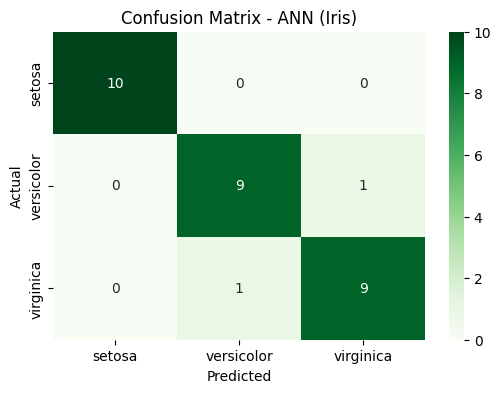

In [11]:
# ==============================
# CONFUSION MATRIX
# ==============================
cm = confusion_matrix(y_test_label, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ANN (Iris)")
plt.show()

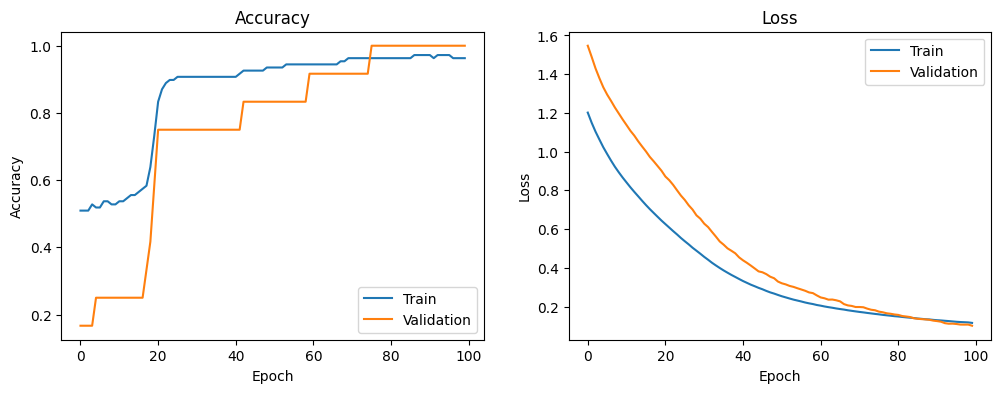

In [12]:
# ==============================
# GRAFIK AKURASI & LOSS
# ==============================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# ==============================
# PREDIKSI MANUAL DARI USER
# ==============================
print("\n=== Prediksi Manual Iris (ANN) ===")
print("=== UKURAN DALAM CENTIMETER (CM) ===")

sepal_length = float(input("Masukkan sepal length: "))
sepal_width  = float(input("Masukkan sepal width : "))
petal_length = float(input("Masukkan petal length: "))
petal_width  = float(input("Masukkan petal width : "))

# Normalisasi input user
input_scaled = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Prediksi
pred_proba = model.predict(input_scaled)
pred_class = np.argmax(pred_proba, axis=1)
pred_label = le.inverse_transform(pred_class)

print(f"\n🌸 Jenis Bunga Iris: {pred_label[0]}")


=== Prediksi Manual Iris (ANN) ===
=== UKURAN DALAM CENTIMETER (CM) ===
Masukkan sepal length: 1
Masukkan sepal width : 2
Masukkan petal length: 3
Masukkan petal width : 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

🌸 Jenis Bunga Iris: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
